<a href="https://colab.research.google.com/github/yudumpacin/turkeypopulationarea/blob/main/Turkey_Population_vs_Area_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turkey Population vs Area Scatter Plot


In [ ]:
import pandas as pd
import numpy as np
import math
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
#get the wikipedia page for province name-population-area info to get the table below
url = "https://en.wikipedia.org/wiki/Provinces_of_Turkey"

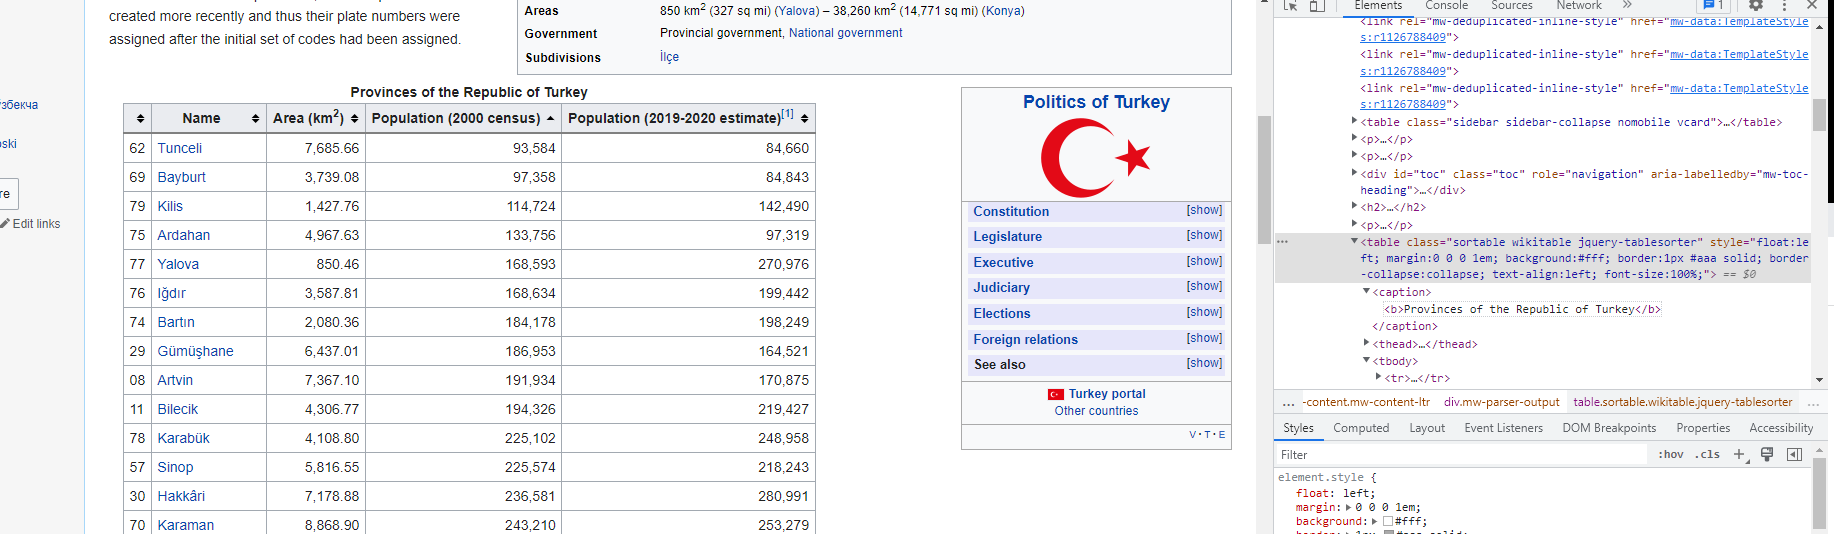

In [ ]:
re = requests.get(url)

In [ ]:
soup = BeautifulSoup(re.text,"html.parser")

In [ ]:
tables = soup.find_all("table")[5]

In [ ]:
#load the table to a list
il_table = []
for tr in tables.find_all("tr"):
    row = [tr.text for tr in tr.find_all('td')]
    il_table.append(row)

In [ ]:
#convert list to dataframe
df = pd.DataFrame(il_table, columns=["Code","Name","Area (km2)","Population (2000 census)","Population (2019-2020 estimate)"])

In [ ]:
##drop first row which is empty
df = df.drop(axis=0,index=0)

In [ ]:
df.head()

,Code,Name,Area (km2),Population (2000 census),Population (2019-2020 estimate)
1,01\n,Adana\n,"14,045.56\n","1,854,270\n","2,237,940\n"
2,02\n,Adıyaman\n,"7,606.16\n","623,811\n","626,465\n"
3,03\n,Afyonkarahisar\n,"14,718.63\n","812,416\n","729,483\n"
4,04\n,Ağrı\n,"11,498.67\n","528,744\n","536,199\n"
5,05\n,Amasya\n,"5,703.78\n","365,231\n","337,800\n"


In [ ]:
#remove /n character
for c in df.columns:
    df[c] = df[c].apply(lambda x: x.replace("\n",""))

In [ ]:
#reset index
df = df.reset_index(drop=True)

In [ ]:
#get geo coordinate of all provinces of Turkey
country ="Türkiye"
df["Latitude"]=0
df["Latitude"]=0
for i,city in enumerate(df["Name"]):
    loc = geolocator.geocode(city+','+ country)
    df.loc[i,"Latitude"] = loc.latitude
    df.loc[i,"Longitude"] = loc.longitude
    
    

In [ ]:
df.head()

,Code,Name,Area (km2),Population (2000 census),Population (2019-2020 estimate),Latitude,Longitude
0,01,Adana,"14,045.56","1,854,270","2,237,940",36.986360,35.325286
1,02,Adıyaman,"7,606.16","623,811","626,465",37.789360,38.314110
2,03,Afyonkarahisar,"14,718.63","812,416","729,483",38.685273,30.642741
3,04,Ağrı,"11,498.67","528,744","536,199",39.777918,43.168437
4,05,Amasya,"5,703.78","365,231","337,800",40.650325,35.832915


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Code                             81 non-null     object 
 1   Name                             81 non-null     object 
 2   Area (km2)                       81 non-null     object 
 3   Population (2000 census)         81 non-null     object 
 4   Population (2019-2020 estimate)  81 non-null     object 
 5   Latitude                         81 non-null     float64
 6   Longitude                        81 non-null     float64
dtypes: float64(2), object(5)
memory usage: 4.6+ KB


In [ ]:
numeric_columns = ["Area (km2)","Population (2000 census)","Population (2019-2020 estimate)"]

In [ ]:
for num_col in numeric_columns:
    df[num_col] =  df[num_col].str.strip().str.replace(',', '').astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Code                             81 non-null     object 
 1   Name                             81 non-null     object 
 2   Area (km2)                       81 non-null     float64
 3   Population (2000 census)         81 non-null     float64
 4   Population (2019-2020 estimate)  81 non-null     float64
 5   Latitude                         81 non-null     float64
 6   Longitude                        81 non-null     float64
dtypes: float64(5), object(2)
memory usage: 4.6+ KB


In [ ]:
df.head()

,Code,Name,Area (km2),Population (2000 census),Population (2019-2020 estimate),Latitude,Longitude
0,01,Adana,14045.56,1854270.0,2237940.0,36.986360,35.325286
1,02,Adıyaman,7606.16,623811.0,626465.0,37.789360,38.314110
2,03,Afyonkarahisar,14718.63,812416.0,729483.0,38.685273,30.642741
3,04,Ağrı,11498.67,528744.0,536199.0,39.777918,43.168437
4,05,Amasya,5703.78,365231.0,337800.0,40.650325,35.832915


In [ ]:
df.describe()

,Area (km2),Population (2000 census),Population (2019-2020 estimate),Latitude,Longitude
count,81.000000,8.100000e+01,8.100000e+01,81.000000,81.000000
mean,9629.549012,8.383882e+05,1.027824e+06,39.279044,35.155546
std,6502.363513,1.231575e+06,1.874413e+06,1.504002,5.053075
min,850.460000,9.358400e+04,8.466000e+04,36.202489,26.558722
25%,5473.290000,3.099140e+05,2.854100e+05,37.872734,30.707455
50%,7685.660000,5.238190e+05,5.361990e+05,39.419172,34.808097
75%,12102.700000,9.507570e+05,1.055412e+06,40.650325,39.491030
max,40813.520000,1.001874e+07,1.551927e+07,41.707805,44.105478


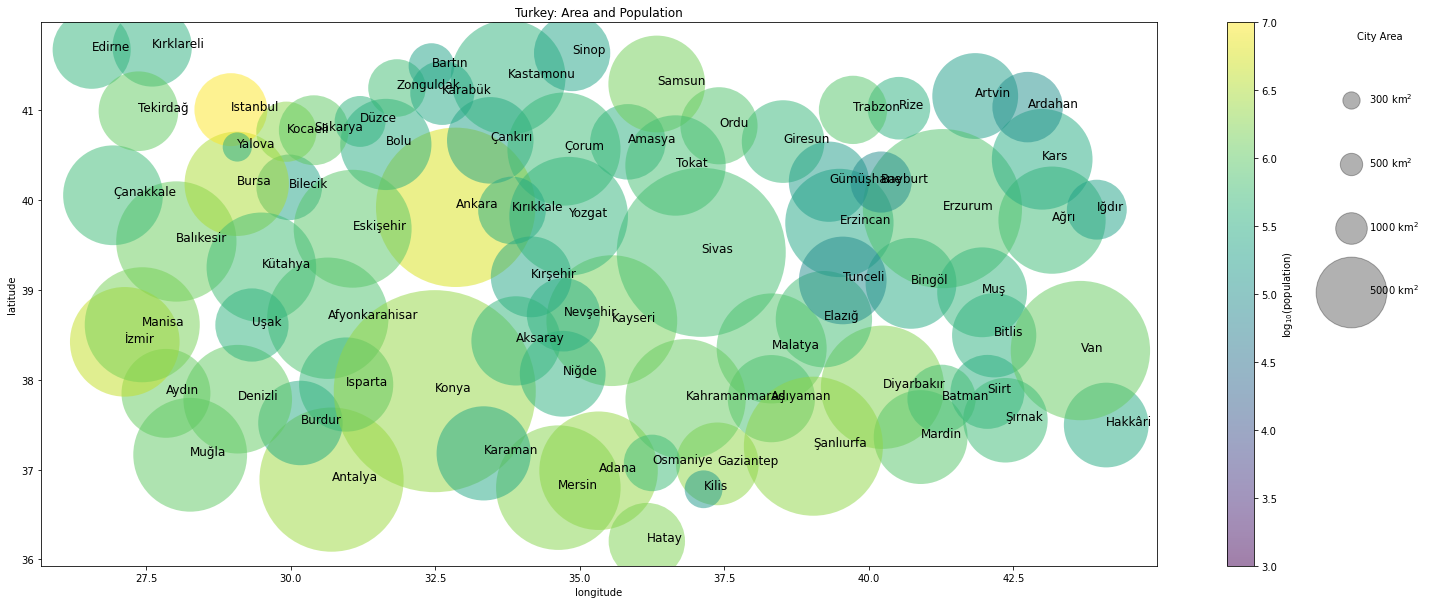

In [ ]:
#Plot the Turkey province data
# Extract the data we're interested in
lat, lon = df['Latitude'], df['Longitude']
population, area = df['Population (2019-2020 estimate)'], df['Area (km2)']

plt.figure(figsize=(25,10))
# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)

for index,row in df[[ "Longitude","Latitude","Name"]].iterrows():
    plt.text(row.Longitude,row.Latitude, row.Name, fontsize=12)
    
    
#plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [300, 500, 1000, 5000]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=5, title='City Area',loc='upper center', bbox_to_anchor=(1.2, 1))

plt.title('Turkey: Area and Population')
plt.show()

# References

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.06-Customizing-Legends.ipynb#scrollTo=DPjCJfcGBElJ
    